# Mean-field:  The Hartree-Fock (HF) Approximation
## Triangular Latice Hubbard model

This notebook contains breif notes and several sample codes of the HF approximation for pedagogical purpose. The following text and codes are prepared by Mr.[Ting-Tung Wang](https://quantummc.xyz/members/ting-tung-wang/), Mr.[Menghan Song](https://quantummc.xyz/members/menghan-song/) and [ZYM](https://quantummc.xyz/members/ziyang-meng/). 

In this notebook, we test the gradient decend method for the Hubbard model on the triangular lattice. One may want to review [HF for square lattice](https://colab.research.google.com/github/songmengh/mean-field/blob/main/HF_Hubbard_square.ipynb) for the detailed description of the algorithms.

This note utilises the following useful references:
1. [Mingpu Qin., arXiv:2110.12400(2022)](https://arxiv.org/abs/2110.12400)
2. [Lechermann, Model Hamiltonians and Basic Techniques](https://www.researchgate.net/publication/299842893_Model_Hamiltonians_and_Basic_Techniques)
3. [Hirsch, Phys. Rev. B 31, 4403 (1985)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.31.4403)
4. [T. Hanisch, Annalen der Physik 507, 303 (1995)](https://onlinelibrary.wiley.com/doi/abs/10.1002/andp.19955070405)

### 1. Hubbard model: Honeycomb Lattice

Considering the half-filling case, the Hamiltonian of the hubbard model is,

$$
H=-t\mathop{\sum}\limits_{\langle i,j \rangle \sigma}c_{i\sigma}^\dagger c_{j\sigma}+h.c.+U\mathop{\sum}\limits_i (n_{i\uparrow}-\frac{1}{2})(n_{i\downarrow}-\frac{1}{2})=H_T+H_U  \ \ \  (U>0),
$$
where $\langle i,j \rangle$ denotes the nearest neighbour hopping on the triangular lattice. 

The figure below shows the triangular lattice,


<img src="https://raw.githubusercontent.com/songmengh/mean-field/main/figures/lattice_tri.png" width=350 height=350/>

Here, sites in different colors mean that they belong to different sublattices. There are 3 sublattices within which the translational invariance holds. And $\vec{a_1} ,\vec{a_2} $ are the two primitive vectors. $\vec{a_1}= \left ( -3/2, \sqrt3/2 \right ) ,\vec{a_2}=\left ( 3/2,\sqrt3/2\right )  $.

For the free fermion case, i.e. $U=0$, the dispersion relation is given by:

$$
E_k=-2\left(\cos k_x+2 \cos \left(\frac{k_x}{2}\right) \cos \left(\frac{\sqrt{3} k_y}{2}\right)\right)
$$ 

as shown in the plot below.

<img src="https://raw.githubusercontent.com/songmengh/mean-field/main/figures/disp_tri.png" width=300 height=300/>

### 2. Hartree-Fock

Similar to the sqaure and Honeycomb lattice, the HF Halmiltonian of the triangular lattice is written as:

$$
\begin{aligned}
H_{h f}=&-t \sum_{\langle i j\rangle \sigma} c_{i \sigma}^{\dagger} c_{j \sigma}+U \sum_i\left(\left\langle n_{i \uparrow}\right\rangle n_{i \downarrow}+\left\langle n_{i \downarrow}\right\rangle n_{i \uparrow}\right.\\
&\left.-\left\langle S_i^{+}\right\rangle S_i^{-}-\left\langle S_i^{-}\right\rangle S_i^{+}-\left\langle n_{i \uparrow}\right\rangle\left\langle n_{i \downarrow}\right\rangle+\left\langle S_i^{+}\right\rangle\left\langle S_i^{-}\right\rangle\right).
\end{aligned}
$$

Here we need to include the spin exchange operators, $S_i^{+}=c_{i \uparrow}^{\dagger}c_{i \downarrow}$, $S_i^{-}=c_{i \downarrow}^{\dagger}c_{i \uparrow}$ which we used to ignore when dealing with square and HC lattice. The reason is that we preassume the anti-ferromagnetic order for square and HC lattice in which we can constrant the magnetization in $z$ direnction. However, triangle lattice is a Mott insulator with 120 degree spin order in the large $U$ limit, we can no longer assume all spins align in one direction. The figure below shows the 120 degree order in one primitive cell.

<img src="https://raw.githubusercontent.com/songmengh/mean-field/main/figures/120order.png" width=200 height=250/>

Then we turn to the momentum space which allows us to study systems with larger sizes. The Hartree-Fock Hamiltonian in $k$ space for each $k$ point is a 6 by 6 matrix (3 sublattice and 2 spin values). 

$$
H = -t \sum_k\left(\begin{array}{lllllllll}
c_{k \uparrow}^{\dagger A} & c_{k \uparrow}^{\dagger B} & c_{k \uparrow}^{\dagger C} & c_{k \downarrow}^{\dagger A} & c_{k \downarrow}^{\dagger B} & c_{k \downarrow}^{\dagger C}
\end{array}\right)\left[\begin{array}{cccccc}
\frac{n_A-2 m_{A}^z}{2} U & A(k) & A^*(k) & -m_A^x U & 0 & 0 \\
A^*(k) & \frac{n_B-2 m_B^z}{2} U & A^A(k) & 0 & -m_B^x U & 0 \\
A(k) & A^*(k) & \frac{n_C-2 m_c^z}{2} U & 0 & 0 & -m_C^x U \\
-m_A^x U & 0 & 0 & \frac{n_A+2 m_{A}^z}{2} U & A(k) & A^*(k) \\
0 & -m_B^x U & 0 & A^*(k) & \frac{n_B+2 m_B^z}{2} U & A(k) \\
0 & 0 & -m_C^x U & A(k) & A^*(k) & \frac{n_C+2 m_c^z}{2} U
\end{array}\right]\left(\begin{array}{l}
c_{k \uparrow}^A \\
c_{k \uparrow}^B \\
c_{k \uparrow}^C \\
c_{k \downarrow}^A \\
c_{k \downarrow}^B \\
c_{k \downarrow}^C
\end{array}\right)
$$

with $A(k)= e^{ik\delta_1}+e^{-ik\delta_2}+e^{ik(\delta_1-\delta_2)}$ and $\delta_1=a_1, \delta_2=a_2$ where $a_1$, $a_2$ are the primitive vectors shown before. For the 120 degree order, we set $n_A=n_B=n_c=n/3$, $m_A^{z}=m, m_A^{x}=0, m_B^{z}=-m/2, m_B^{x}=-\sqrt {3}m/2, m_C^{z}=-m/2, m_C^{x}=\sqrt {3}m/2$

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
def genH(H_T,a):
    H = H_T
    H[:,0,0] = -a
    H[:,1,1] = a/2
    H[:,2,2] = a/2
    H[:,3,3] = a
    H[:,4,4] = -a/2
    H[:,5,5] = -a/2
    H[:,1,4] = np.sqrt(3)/2*a
    H[:,2,5] = -np.sqrt(3)/2*a
    H[:,4,1] = np.sqrt(3)/2*a
    H[:,5,2] = -np.sqrt(3)/2*a
    return H
    

In [8]:
def blkeig(H,dHdm):
    N = H.shape[0]
    dedm = 0
    P = np.zeros((6,6*N),dtype='complex')
    D = np.zeros((6*N),dtype='complex')
    for i in range(N):
        eig_value,eig_vec = np.linalg.eig(H[i])
        D[i*6:i*6+6] = eig_value
        P[:,6*i:6*i+6] = eig_vec
    idx_sort = np.argsort(D)
    D = D[idx_sort]
    P = P[:,idx_sort]
    delta = np.real(D[3*N]-D[3*N-1]) #energy gap for half-filled
    E_Fermi = np.real(D[3*N-1])
    D = D[:3*N]
    P = P[:3*N]
    for i in range(3*N):
        dedm += np.real(P[:,i].conjugate().T @ dHdm @ P[:,i])
    e = np.real(sum(D))
    dedm = np.real(dedm/(3*N))
    e = e/(3*N)
    
    return e,dedm,delta,E_Fermi
    

In [9]:
def gendHdm(U):
    dHdm = np.zeros((6,6))
    dHdm[0,0]=-U
    dHdm[1,1]=U/2
    dHdm[2,2]=U/2
    dHdm[3,3]=U
    dHdm[4,4]=-U/2
    dHdm[5,5]=-U/2
    dHdm[1,4]=np.sqrt(3)/2*U
    dHdm[2,5]=-np.sqrt(3)/2*U
    dHdm[4,1]=np.sqrt(3)/2*U
    dHdm[5,2]=-np.sqrt(3)/2*U
    return dHdm

In [10]:
Ulist = np.arange(4.4,6.4,0.05)
Llist = [180]
alpha = 0.1

e_end = np.inf*np.ones((len(Llist),len(Ulist)))
m_end = np.zeros((len(Llist),len(Ulist)))
itr_end = np.zeros((len(Llist),len(Ulist)))
delta_end = np.zeros((len(Llist),len(Ulist)))
e_end = np.zeros((len(Llist),len(Ulist)))

In [11]:
for i in range(len(Llist)):
    L = Llist[i]
    N = L**2
    Ne = 3*N #one unit cell 3 electrons
    H_T = np.zeros((N,6,6),dtype='complex')
    for j in range(N):
        k = (np.mod(j,L)+1)*np.array([1/3,-np.sqrt(3)/3])+math.ceil((j+1)/L)*np.array([1/3,np.sqrt(3)/3])
        k = k*2*np.pi/L
        A = np.exp(1j*k@np.array([3/2,-np.sqrt(3)/2]))+np.exp(-1j*k@np.array([3/2,np.sqrt(3)/2]))+np.exp(1j*k@np.array([0,np.sqrt(3)]))
        H_T[j,0,1]=A
        H_T[j,0,2]=A.conjugate()
        H_T[j,1,2]=A
        H_T[j,3,4]=A
        H_T[j,3,5]=A.conjugate()
        H_T[j,4,5]=A
        H_T[j,:,:]=H_T[j,:,:]+(H_T[j,:,:].conjugate()).T
        
    m = 0.005*np.random.random()
    for k in range(len(Ulist)):
        U=Ulist[k]
        error = 1
        itr=0
        dHdm = gendHdm(U)
        while abs(error)>10**-4:
            a = m*U
            H = genH(H_T,a)
            e,dedm,non,non = blkeig(H,dHdm)
            dedm = dedm+2*U*m
            error = alpha*dedm
            m -= error
            itr+=1
        m+=0.00001
        error=1
        while abs(error)>10**-8:
            a = m*U
            H = genH(H_T,a)
            e,dedm,delta,non = blkeig(H,dHdm)
            dedm+=2*U*m
            error=alpha*dedm
            m-=error
            itr+=1
        delta_end[i,k]=delta
        m_end[i,k]=abs(m)
        itr_end[i,k]=itr
        e_end[i,k]=e

        

In [ ]:
np.save(file='m180.npy',arr=m_end)
np.save(file='delta180.npy',arr=delta_end)
np.save(file='itr180.npy',arr=itr_end)
np.save(file='e180.npy',arr=e_end)

As it can be seen, there are two phase transitions at half-filling by varying U values. [[1]](https://arxiv.org/abs/2110.12400) At $U ≈ 5.14$ we can find a first order transition. There is another phase transition at $U ≈ 4.8$. It is interesting to notice that the energy gap $\Delta$ only opens for $U > U_{c2}$. Therefore, the 120 degree Mott insulartor phase only occurs for $U>U_{c2}$. Between $U_{c1}$ and $U_{c2}$, it was known that the ground state is a helis order with the wavevector varying with $U$. [[4]](https://onlinelibrary.wiley.com/doi/abs/10.1002/andp.19955070405) Note that HF approximation usually overestimates the magnitude of the order so the critical $U_{c2}$ here is smaller than the value from more accurate many-body calculations.[[1]](https://arxiv.org/abs/2110.12400)

Text(0, 0.5, 'm')

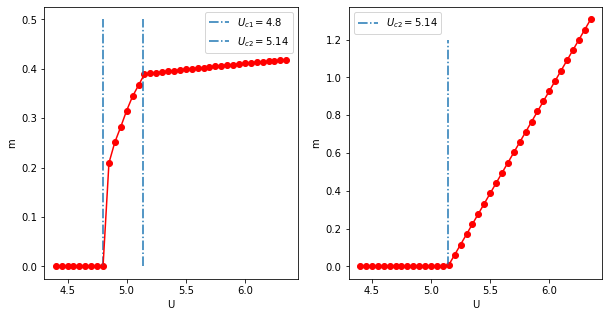

In [68]:
m_end = np.load('m180.npy')
delta_end= np.load('delta180.npy')
itr_end = np.load('itr180.npy')
e_end = np.load('e180.npy')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1 = plt.subplot(1,2,1)
ax1.scatter(Ulist,m_end[0],marker='o',color='r')
ax1.plot(Ulist,m_end[0],linestyle='-',color='r')
ax1.vlines(4.8,0,0.5,linestyles='-.',label='$U_{c1} = 4.8$')
ax1.vlines(5.14,0,0.5,linestyles='-.',label='$U_{c2} = 5.14$')
ax1.legend()
ax1.set_xlabel('U')
ax1.set_ylabel('m')


ax2=plt.subplot(1,2,2)
ax2.scatter(Ulist,delta_end[0],marker='o',color='r')
ax2.plot(Ulist,delta_end[0],linestyle='-',color='r')
#plt.vlines(4.8,0,0.5,linestyles='-.',label='$U_{c1}$')
ax2.vlines(5.14,0,1.2,linestyles='-.',label='$U_{c2}=5.14$')
ax2.legend()
ax2.set_xlabel('U')
ax2.set_ylabel('m')

# To be continued ...